# `692 Team 1 Proj-1 : Crime Novel Plot Analysis with Regex - Agatha Christie`

## Objective
The goal of this project is to conduct a plot and protagonist/antagonist analysis of the famous crime novels. For this project, we will analyze five publicly available crime novels/stories by Agatha Christie at the project Gutenberg http://www.gutenberg.org/. The novels chosen are: 

- The Murder on the Links 
- The Mysterious Affair at Styles 
- The Secret Adversary 
- The Man in the Brown Suit 
- The Secret of Chimneys 

Note: Feel free to use any background resource for the understanding of the plot, protagonist and antagonist names, and other details. Look for spoilers, details, etc. Our goal is not to predict the crime, but to computationally analyze the structure of the plot.


## Data Collection and Preparation 

### Background Research for Data Collection and Preparation 

##### Data Collection
Location for Plain text UTF-8 files for novels: 
- The Mysterious Affair at Styles https://www.gutenberg.org/files/863/863-0.txt
- The Murder on the Links https://www.gutenberg.org/files/58866/58866-0.txt
- The Secret Adversary https://www.gutenberg.org/files/1155/1155-0.txt
- The Man in the Brown Suit https://www.gutenberg.org/files/61168/61168-0.txt
- The Secret of Chimneys https://www.gutenberg.org/files/65238/65238-0.txt

Note: One benefit to getting the text version is that the html version also has page number to clean, not present in text files

##### Data Preparation
- There are inconsistencies between the novel formats. Some of them start with a prologue and others dont. 
- There is START OF THE PROJECT present in the beginning of most but not all books, others have 'START OF THIS PROJECT', but   table of contents appear after that.
- Some of them have the word table of contents, others say contents
- some follow roman numeral in naming chapters, others dont
- Some use the word 'chapter' , others just kist chapter titles followed by a number
- Novel text files have license and other info at the end

These factors above will need to be considered in data cleaning. 
Listing a few key particulars below: 

- The Murder on the Links 
  - This Phrase is present at the beginning - \*** START OF THIS PROJECT 
  - The Novel plot starts at second instance of '1 A Fellow Traveller'. Novel ends at 'End of Project Gutenberg's The Murder on the Links, by Agatha Christie
  - and has \*** END OF THIS PROJECT GUTENBERG ...' at the end. .
  - Each chapter  starts with number followed by title of chapter
  
  
- The Mysterious Affair at Styles 
    - This Phrase is present at the beginning - \*** START OF THE PROJECT 
    - The Novel plot starts at second instance of 'chapter I.' # period is important here. 
    - Novel ends at 'THE END' and has \*** END OF THE PROJECT GUTENBERG EBOOK...'. 
    - Each chapter starts with 'Chapter' followed by chapter number in roman numeral, followed by new line, followed by title of chapter
  

- The Secret Adversary 
  - This Phrase is present at the beginning - \*** START OF THIS PROJECT 
  - The Novel plot starts at second instance of 'PROLOGUE'. Novel ends at 'End of the Project Gutenberg EBook of The Secret Adversary, by Agatha Christie' 
  -  has \*** END OF THIS PROJECT GUTENBERG ...' at the end. 
  - Each chapter starts with 'Chapter' followed by chapter number in roman numeral, followed by title of chapter


- The Man in the Brown Suit 
  - This Phrase is present at the beginning - \*** START OF THIS PROJECT 
  - The Novel starts at second instance of 'PROLOGUE'. Novel ends at 'End of Project Gutenberg's The Man in the Brown Suit, by Agatha Christie' 
  - has \*** END OF THIS PROJECT GUTENBERG ...' at the end. 
  - Each chapter starts with 'Chapter' followed by chapter number in roman numeral


- The Secret of Chimneys 
  - This Phrase is present at the beginning - \*** START OF THE PROJECT 
  - The Novel plot starts at second instance of '1 (new line)
  - Anthony Cade Signs on' # new line is first here. 
  - Novel ends at 'Transcriber's Notes:' and has \*** END OF THE PROJECT GUTENBERG...' at the end.
Each chapter starts with number followed by new line followed by title of chapter


##### Data Tokenization
Note: since we are not allowed to use NLTK or Spacy for tokenization, we will have to use python for this as well. 
We can use split() but that would be very basic as it doesnt achieve tokens in a linguistic sense; we should be able to use the re package that adds support for regex; after all the point for us is to learn regex better. Recommend using re.split with our custom regex 
https://docs.python.org/3/library/re.html

##### Helpful Reference Links
- https://stackoverflow.com/questions/7243750/download-file-from-web-in-python-3
- https://docs.python.org/3/howto/urllib2.html
- https://python.plainenglish.io/how-to-tokenize-sentences-without-using-any-nlp-library-in-python-a381b75f7d22 
- https://stackoverflow.com/questions/21361073/tokenize-words-in-a-list-of-sentences-python



### Data Collection and Preparation Code



##### Helper Functions for retrieving and cleaning corpus


In [36]:
#Author: Luke+Veronica
#Description: Functions for retrieving and cleaning corpus
import urllib.request, re

# this function accepts a book title as a parameter and fetches the index based on the title 
def get_index(title):
  last_reg=re.compile(r"\w+$")
  last_word=re.findall(last_reg,title)[0]
  if last_word =="Links":
    #"The Murder on the Links"
    index=1
  elif last_word=="Styles":
    #"The Mysterious Affair at Styles"
    index=2
  elif last_word=="Adversary":
    #"The Secret Adversary"
    index=3
  elif last_word=="Suit":
    #"The Man in the Brown Suit"
    index=4
  elif last_word=="Chimneys":
    #"The Secret of Chimneys"
    index=5
  return index


# this function accepts a book index as a parameter and get the text for the book from project gutenberg 
def get_text(index):
  if index==1:
    #"The Murder on the Links"
    url = "https://www.gutenberg.org/files/58866/58866-0.txt"
  elif index==2:
    #"The Mysterious Affair at Styles"
    url="https://www.gutenberg.org/files/863/863-0.txt"
  elif index==3:
    #"The Secret Adversary"
    url="https://www.gutenberg.org/files/1155/1155-0.txt"
  elif index==4:
    #"The Man in the Brown Suit"
    url="https://www.gutenberg.org/files/61168/61168-0.txt"
  elif index==5:
    #"The Secret of Chimneys"
    url="https://www.gutenberg.org/files/65238/65238-0.txt"
  response = urllib.request.urlopen(url)
  data = response.read()      # a `bytes` object
  text = data.decode('utf-8')
  return text


# this function accepts a book index  and returns an appropriate regex that can carve out chapters for that book
def get_ch_regex(index):
  if index==1:
    ch_carve=re.compile(r'\n\d\d?\s[\'\"\u201c]?[A-Z].*\n')
  elif index==2:
    ch_carve=re.compile(r'CHAPTER\s[IVX]+\.\r\n.*\r\n')
  elif index==3:
    ch_carve=re.compile(r'\r\n\r\n\r\nCHAPTER.*\r\n')
  elif index==4:
    ch_carve=re.compile(r'CHAPTER\s\w+\r\n')  
  elif index==5:
    ch_carve=re.compile(r'\d\d?\r\n\r\n[A-OQ-Z].*\r\n')
  return ch_carve


# this function accepts a book index and chapter contents as parameters and trims out any Project gutenberg related artifacts that are not part of the novel
def trim_contents(ch_contents_dict,index):
  last=len(ch_contents_dict)
  if index==1:
    ch_contents_dict[last]=ch_contents_dict[last].split('\nEnd of Project Gutenberg')[0]
  elif index==2:
    ch_contents_dict[last]=ch_contents_dict[last].split('\nTHE END')[0]
  elif index==3:
    ch_contents_dict[last-1]=ch_contents_dict[last-1].split('\nEnd of the Project Gutenberg')[0]
  elif index==4:
    ch_contents_dict[last-1]=ch_contents_dict[last-1].split('THE END')[0]
  elif index==5:
    ch_contents_dict[last]=re.split(r"TRANSCRIBER",ch_contents_dict[last])[0]
  return ch_contents_dict


# this function accepts chapter as a parameter and removes white spaces
def remove_white(chapter):
  regex=r'[\r\n\u200a_]+'
  chapter = re.sub(regex,' ',chapter)
  return chapter


# this function accepts chapter as a parameter and carves out sentences
def sent_carve(chapter):
  #chapter=re.split(r'(?<![A-H|J-Z])[\.\?!](?![\'\"\u2019\u201a\u201c\u275c\u275f\u201e\u201d\u0022\u275e]\s[a-z])(?![\'\"\u2019\u201a\u201c\u275c\u275f\u201e\u201d\u0022\u275e]\sI said)[\'\"\u2018\u2019\u201c\u201d\)\]]*\s*(?<!\w\.\w)(?<![A-Z][a-z][a-z])(?<![A-Z][a-z])\s+',chapter,flags=re.UNICODE)
  chapter=re.split(r'(?<![^A-Z][A-H|J-Z])(?<!Mr|Ms|Dr)(?<!Mrs)(?<!Mlle)(?<!Melle)(?<!\w\.\w)[\.\?!](?![\'\"\u2019\u201a\u201c\u275c\u275f\u201e\u201d\u0022\u275e]\s[a-z])[\'\"\u2018\u2019\u201c\u201d\)\]]*\s*|\u2014\u201d\s*',chapter,flags=re.UNICODE)
  chapter=chapter[:-1]
  chapter={num:contents.lower() for (num,contents) in enumerate(chapter)}
  return chapter


# this function accepts a book title and carves out chapters and returns a dictionary of book title, chapter contents and chapter title
def ch_carve(title):

  index=get_index(title)
  text=get_text(index)
  ch_regex=get_ch_regex(index)
  if index ==3:
    text=re.split("CHAPTER XXVIII.     AND AFTER\r\n\r\n\r\n\r\nPROLOGUE",text)[1]
  if index ==4:
    text=re.split("PROLOGUE",text)[1]
  ch_titles=re.findall(ch_regex,text)
  ch_titles_dict={num+1:remove_white(title.strip()) for (num,title) in enumerate(ch_titles)}
  if index==3 or index ==4:
    ch_titles_dict.update( {0 :"PROLOGUE"} )
  chapters=re.split(ch_regex,text)
  if index==3 or index==4:
    ch_contents_dict = {num:contents for (num,contents) in enumerate(chapters)}  
  elif index ==1 or index ==2 or index==5:
    chapters=chapters[1:]
    ch_contents_dict = {num+1:contents for (num,contents) in enumerate(chapters)}
  ch_contents_dict=trim_contents(ch_contents_dict,index)
  return {"title":title,"contents":ch_contents_dict,"chapters":ch_titles_dict}


# this function calls other helper functions and gets the corpus we will be working with
def get_corpus():
  #tentatively planning to index books from 1 to match chapters
  titles=["The Mysterious Affair at Styles","The Murder on the Links","The Secret Adversary","The Man in the Brown Suit","The Secret of Chimneys"]
  corpus={ get_index(title):ch_carve(title) for title in titles}
  return corpus


# this function calls other helper functions and cleans the corpus
def clean_corpus(corpus):
  for keyb,value in corpus.items():
    for  keyc,value in value["contents"].items():
      corpus[keyb]["contents"][keyc]=sent_carve(remove_white(value))
    
  return corpus


# this function returns each chapter as a single blob of text
def sent_blob(chapter):
  temp=''  
  #chapter=re.split(r'(?<![A-H|J-Z])[\.\?!](?![\'\"\u2019\u201a\u201c\u275c\u275f\u201e\u201d\u0022\u275e]\s[a-z])(?![\'\"\u2019\u201a\u201c\u275c\u275f\u201e\u201d\u0022\u275e]\sI said)[\'\"\u2018\u2019\u201c\u201d\)\]]*\s*(?<!\w\.\w)(?<![A-Z][a-z][a-z])(?<![A-Z][a-z])\s+',chapter,flags=re.UNICODE)
  chapter=re.split(r'(?<![^A-Z][A-H|J-Z])(?<!Mr|Ms|Dr)(?<!Mrs)(?<!Mlle)(?<!Melle)(?<!\w\.\w)[\.\?!](?![\'\"\u2019\u201a\u201c\u275c\u275f\u201e\u201d\u0022\u275e]\s[a-z])[\'\"\u2018\u2019\u201c\u201d\)\]]*\s*|\u2014\u201d\s*',chapter,flags=re.UNICODE)
  chapter=chapter[:-1]
  for ch in chapter:
    temp=temp+" "+ch.lower()    
  return temp


# this function removes punctuation 
def remove_punc(blob):
  blob=re.sub(r"[\u201c\u201d\?,;:\.!\u2018\u2019\u201a\u275b\u275c\u275f\s-]+" ,' ',blob)
  return blob
def tighten(blob):
  return re.sub(r"\s+"," ",blob)


# this function adds a dictionary to the corpus that contains each book as a single blob of test accessed via corpus["blob"]
def blob_corpus(dirty_corpus):
  for keyb,value in dirty_corpus.items():
    blob=''
    for  keyc,value in value["contents"].items():
      blob=blob+" "+tighten(remove_punc(remove_white(sent_blob(dirty_corpus[keyb]["contents"][keyc]))))
    dirty_corpus[keyb]["blob"]=blob  
  return dirty_corpus


##### Functions for retrieving and cleaning corpus


In [37]:
#Author: Luke 
#Description: collect and clean corpus

dirty_corpus=get_corpus()
dirty_corpus=blob_corpus(dirty_corpus)
corpus=clean_corpus(dirty_corpus)

#print(corpus[1]["title"],len(corpus[1]["chapters"]),len(corpus[1]["contents"]))
#print(corpus[1]["contents"][28])
#print(corpus[2]["contents"][13])
#print(corpus[1]["blob"])





## Data Analysis
Goal of this project is to analyze the frequencies of occurrence of the protagonists and the perpetrator(s) across the novel - per chapter, and per sentence in a chapter, the mention of the crime, and other circumstances surrounding the antagonists. The ultimate objective is to use basic NLP tools to observe any patterns in plot structures across the works of one or all of the authors.  Specifically, analysis questions below need to be answered. 

Note: To effectively conduct this analysis, you should find resources, and read the plot summaries of each novel, so you can make your search more effective. If plot summaries are not available, use regex to search for clues, and report how well/how fast that approach worked. 


###  Background Research for Data Analysis
Details of each book compiled by reading plot summaries, books themselves, articles and fanpages:

- The Murder on the Links 
  - Lead detective(s): Hercule Poirot, Arthur Hastings
  - Other detectives/assistants:  Monsieur Giraud, Monsieur Hautet
  - Victim: Paul Renauld
  - Suspects: Jack Renauld
  - Perpetrator: Marthe Daubreuil.
  - Other important characters:  Paul Renauld, Eloise Renauld, Jack Renauld, Madame Daubreuil, Gabriel Stonor, Georges Conneau, Madame Beroldy, Marthe Daubreuil, Bella Duveen, Dulcie Duveen (Cindrella), Cindrella
  - Crime: Murder, Stabbing
  - motif: murder mystery
https://en.wikipedia.org/wiki/The_Murder_on_the_Links
https://agathachristie.fandom.com/wiki/The_Murder_on_the_Links


- The Mysterious Affair at Styles 
  - Lead detective: Hercule Poirot, Arthur Hastings
  - Other detectives/assistants: 
  - Victim: Emily Inglethorp
  - Suspects: Alfred Inglethorp , Cavendish
  - Perpetrator(s): Alfred Inglethorp, Evelyn Howard
  - Other important characters: John Cavendish, 
  - Crime: Murder, Poisoning
  - motif: murder mystery
https://agathachristie.fandom.com/wiki/The_Mysterious_Affair_at_Styles


- The Secret Adversary
  - Lead detective: Tommy and Tuppence, Tommy Beresford, Tuppence Cowley, Prudence Cowley, Prudence "Tuppence" Cowley, 
  - Other detectives/assistants: 
  - Victim: Jane Finn, Mrs. Vandemeyer
  - Suspects: Mr. Brown,  Julius Hersheimmer
  - Perpetrator: Sir James Peel Edgerton
  - Other important characters: Jane Finn
  - Crime: Espionage, Kidnapping, Theft
  - motif: thriller focus rather than detection https://agathachristie.fandom.com/wiki/The_Secret_Adversary#Plot_details


- The Man in the Brown Suit
  - Lead detective: Anne Beddingfeld
  - Other detectives/assistants: 
  - Victim: Nadina aka Anita Grünberg, L. B. Carton
  - Suspects: Harry
  - Perpetrator: Sir Eustace Pedler
  - Other important characters: Nadina, Count Sergius Paulovitch, the Colonel,  , Suzanne Blair, Colonel Race, Guy Pagett, Harry Rayburn, Harry Rayburn, Rev. Chichester, Miss Pettigrew,Harry Parker, Chichester
  - Crime: diamond theft, murders, kidnapping
  - motif: thriller focus rather than detection


- The Secret of Chimneys
  - Lead detective: Anthony Cade aka Prince Nicholas
  - Other detectives/assistants: Superintendent Battle, Monsieur Lemoine of the Sûreté, Mr. Fish aka american agent
  - Victim: Perceived: Count Stanislaus aka Prince Michael Obolovitch
  - Suspects: Anthony Cade, Prince Nicholas, King Victor, 
  - Perpetrator: Mlle Brun aka Queen Varaga aka Angèle Mory, M Lemoine aka King Victor
  - Other important characters: King Nicholas IV, Queen Varaga aka Angèle Mory, Herman Isaacstein, Prince Michael Obolovitch,  George Lomax, Count Stylptitch, Jimmy McGrath, Virginia Revel, Captain O'Neill, Captain O'Neill, Mr Holmes, Isaacstein, Hiram P. Fish, Prince Nicholas, Mademoiselle Mlle Brun, Bill Eversleigh, Monsieur Lemoine of the Sûreté, Professor Wynwood, Boris Anchoukoff,
  - Crime: sensitive document theft, murders, treasure hunt, espionage
  - motif: thriller focus rather than detection





### Data Analysis Code



#### Helper functions for answering analysis questions in the objective


In [38]:
#Author: Luke 
#Description Helper functions for answering questions

#returns the regex for the detective in each book using book index
def get_det(index):
  if index==1:
    det=re.compile(r"hercules?(?!a)|poirot|arthur|hastings")
  elif index==2:
    det=re.compile(r"hercules?(?!a)|poirot|arthur|hastings")
  elif index==3:
    # det=re.compile(r"tuppence|beresford|prudence|cowley")
    det=re.compile(r"tuppence|prudence|cowley|tommy|beresford")
  elif index==4:
    det=re.compile(r" anne|beddingfeld")
  elif index==5:
    det=re.compile(r"anthony|cades")
  else:
    det=re.compile(r"nobody")
  return det


#returns regex for perpetrator for book via index
def get_perp(index):
  if index==1:
    #checked book for abbreviations Mlle,mlle,Melle,melle - none occured in text
    perp=re.compile(r"mademoiselle marthe daubreuil|mademoiselle marthe|mademoiselle daubreuil|marthe daubreuil|marthe")
    #perp=re.compile(r"mademoiselle( marthe)? daubreuil|marthe daubreuil|marthe")
  elif index==2:
    perp=re.compile(r"alfred inglethorp|mr\. inglethorp|alfred|second cousin|evelyn howard|evelyn|miss howard|evie")
  elif index==3:
    #perp=re.compile(r"sir james peel edgerton|james peel edgertion|sir james edgerton|sir edgerton|james peel|peel edgertion|sir james|james")
    perp=re.compile(r"sir james peel edgerton|james peel edgerton|sir james edgerton|sir edgerton|james peel|peel edgerton|sir james|(?<!st) james")
  elif index==4:
    perp=re.compile(r"sir eustace pedler|eustace pedler|sir eustace|sir pedler|eustace|pedler")
  elif index==5:
    perp=re.compile(r"mademoiselle genevieve brun|mademoiselle brun|mlle brun|brun")
    #perp=re.compile(r"mlle|brun|queen|varaga|angèmle|mory|m lemoine|king|victor")
    #ignoring the aliases for now 
   #perp= re.compile(r"mlle|brun|queen|varaga|angèle|mory|m lemoine|king|victor")
  else:
    # V: shouldn't get here
    perp=re.compile(r"someone else")
  return perp


#returns crime regex for book via index
def get_crime(index):
  if index==1:
    crime=re.compile(r"murdered|body (was|had been) discovered|discovered.*body|death.*occured|occured.*death|examination.*body|body.*examination|only.*committed the crime")
  elif index==2:
    crime=re.compile(r"convulsion|night of the murder|(mrs\. inglethorp|emily|old lady|wife|mother).*poison|poison.*(mrs\. inglethorp|emily|old lady|wife|mother)|motionless|strychnine.*killed|lost her life|introduce.*murderer|poirot.*read|master mind")
  elif index==3:
    # crime=re.compile(r"kidnapping|espionage")
    crime=re.compile(r"kidnap|espionage|spy|theft|disappear|stole")
  elif index==4:
    crime=re.compile(r"murder|theft")
  elif index==5:
    crime=re.compile(r"discovered the body|assasination|assasinated| killed")
  else:
    # V: shouldn't get here
    crime=re.compile(r"nothing happened")
  return crime


# returns other suspect(s) for book via index
def get_sus(index):
  if index==1:
    sus=re.compile(r"jack")
  elif index==2:
    sus=re.compile(r"john cavendish|(?<!purchased by )mr\. cavendish|john")
  elif index==3:
    # removing Mr. Brown since it was an alias
    #sus=re.compile(r"julius hersheimmer|mr.? hersheimmer|hersheimmer|julius")
    sus=re.compile(r"julius hersheimmer|mr\.? hersheimmer|julius p\. hersheimmer|hersheimmer|julius")
  elif index==4:
    sus=re.compile(r"harry")
  elif index==5:
    sus=re.compile(r"king victor|victor")
  else:
    # V: shouldn't get here
    sus=re.compile(r"no suspect")
  return sus


#returns all occurences of a regex in a book
def get_occur(index,regex):
  occur=[]
  for ch_index,ch_contents in corpus[index]["contents"].items():
    for sent_index,sent_contents in ch_contents.items():
      matches=re.search(regex,sent_contents)
      if matches is not None:
        #occur.append([ch_index,sent_index,sent_contents])
        occur.append(["Chapter: {0}".format(ch_index), "Sentence: {0}".format(sent_index), "Contents: {0}".format(sent_contents)])
        #print("Chapter: ",ch_index, "Sentence: ", sent_index, "Contents: ",sent_contents)
  return occur


# returns all co-occurences of two regexes in a book
def get_co_occur(index, det,perp):
  co_occur=[]
  for ch_index,ch_contents in corpus[index]["contents"].items():
    for sent_index,sent_contents in ch_contents.items():
      dmatches=re.search(det,sent_contents)
      pmatches=re.search(perp,sent_contents)
      if dmatches is not None and pmatches is not None:
        #co_occur.append([ch_index,sent_index,sent_contents])
        co_occur.append(["Chapter: {0}".format(ch_index), "Sentence: {0}".format(sent_index), "Contents: {0}".format(sent_contents)])
        #print("Chapter: ",ch_index, "Sentence: ", sent_index, "Contents: ",sent_contents)
  return co_occur


# returns a list of the 3 words the precede and the 3 words that follow each occurence of a regex in a book
def get_3words(book,perp):
  blob=corpus[book]["blob"]
  answer=[]
  splits=re.finditer(perp,blob)
  for iter in splits:
    before=re.split(r"\s+",blob[0:iter.start()-1])
    if len(before)>2:
      before=[before[-3],before[-2],before[-1]]
    elif len(before)==2:
      before=[" ", before[-2],before[-1]]
    elif len(before)==1:
      before=[" "," ",before[0]]
    elif len(before)==0:
      before=[" "]
 #   print(before)
    after=re.split(r"\s+",blob[iter.end()+1:])
    if len(after)>2:
      after=[after[0],after[1],after[2]]
    elif len(after)==2:
      after=[after[0],after[1]," "]
    elif len(after)==1:
      after=[after[0]," "," "]
    elif len(after)==0:
      after=[" "]
    answer.append(before+after)
  return answer

  #splits=[re.finditer(r"\s+",sp) for sp in splits]

    
#returns the sentence before, sentence containing, and sentence afte for each math to a regex in a book - for invetigation not answering questions
def get_3sentences(book,ch,sent):
  near3=[]
  if sent==max(corpus[book]["contents"][ch].keys()):
    near3=[[sent-2,corpus[book]["contents"][ch][sent-2]],[sent-1,corpus[book]["contents"][ch][sent-1]],[sent,corpus[book]["contents"][ch][sent]]]
  elif sent==min(corpus[book]["contents"][ch].keys()):
    near3=[[sent,corpus[book]["contents"][ch][sent]],[sent+1,corpus[book]["contents"][ch][sent+1]],[sent+2,corpus[book]["contents"][ch][sent+2]]]
  else:
    near3=[[sent-1,corpus[book]["contents"][ch][sent-1]],[sent,corpus[book]["contents"][ch][sent]],[sent+1,corpus[book]["contents"][ch][sent+1]]]
  return near3



#### Functions for answering analysis questions in the objective 

The plot summary answers derived from Regex are located below each book heading



###### The Murder on the Links 


In [39]:
#Author: Luke
#Description: demo of code for answering questions/book 1 code
  
det=get_det(1)
perp=get_perp(1)
crime=get_crime(1)
sus=get_sus(1)
det_occur=get_occur(1,det)
perp_occur=get_occur(1,perp)
co=get_co_occur(1,det,perp)
crime=get_occur(1,crime)
sus_occur=get_occur(1,sus)
print(det_occur)
print(perp_occur)
print(co)
print(crime)
print(sus_occur)
print(perp_occur)
perp_neighbors=get_3words(1,perp)
for n in perp_neighbors:
  print(n)
print(len(perp_neighbors))

[['Chapter: 1', 'Sentence: 4', 'Contents: i had been transacting some business in paris and was returning by the morning service to london where i was still sharing rooms with my old friend, the belgian ex-detective, hercule poirot'], ['Chapter: 1', 'Sentence: 127', 'Contents: “that was poirot’s first big case'], ['Chapter: 2', 'Sentence: 1', 'Contents: my friend poirot, exact to the minute as usual, was just tapping the shell of his second egg'], ['Chapter: 2', 'Sentence: 8', 'Contents: elsewhere, i have described hercule poirot'], ['Chapter: 2', 'Sentence: 18', 'Contents: ” i slipped into my seat, and remarked idly, in answer to poirot’s greeting, that an hour’s sea passage from calais to dover could hardly be dignified by the epithet “terrible'], ['Chapter: 2', 'Sentence: 19', 'Contents: poirot waved his egg-spoon in vigorous refutation of my remark'], ['Chapter: 2', 'Sentence: 41', 'Contents: poirot shook his head seriously'], ['Chapter: 2', 'Sentence: 59', 'Contents: poirot threw 

['she', 'was', 'afraid', 'said', 'm', 'hautet']
['turned', 'to', 'her', 'dear', 'but', 'the']
['to', 'speak', 'before', 'as', 'my', 'daughter']
['us', 'it', 'was', 'i', 'beg', 'your']
['our', 'amélie', 'explained', 'with', 'a', 'blush']
['your', 'heart', 'on', 'she', 'is', 'not']
['the', 'quarrel', 'was', 'renauld', 'sprang', 'round']
['admitted', 'i', 'love', 'and', 'i', 'wish']
['boy', 'you', 'too', 'is', 'as', 'good']
['have', 'nothing', 'against', 'in', 'any', 'way']
['your', 'intentions', 'towards', 'he', 'resumed', 'he']
['he', 'had', 'against', 'to', 'that', 'he']
['i', 'was', 'marrying', 'and', 'not', 'her']
['i', 'wrote', 'to', 'telling', 'her', 'what']
['yesterday', 'it', 'was', 'today', 'it', 'is']
['to', 'rag', 'me', 'is', 'a', 'very']
['him', 'out', 'with', 'but', 'i', 'fear']
['beautiful', 'girl', 'like', 'and', 'the', 'result']
['always', 'think', 'of', 'as', 'the', 'girl']
['of', 'the', 'beautiful', 'chéri', 'she', 'was']
['you', 'know', 'it', 'jack', 'renauld', 'replie



#####  The Mysterious Affair at Styles


In [40]:
# Block for book 2
#Author: Luke
for ind,sent in corpus[2]["contents"][13].items():
  print(ind,sent)
det=get_det(2)
perp=get_perp(2)
crime=get_crime(2)
sus=get_sus(2)
det_occur=get_occur(2,det)
perp_occur=get_occur(2,perp)
co=get_co_occur(2,det,perp)
crime=get_occur(2,crime)
sus_occur=get_occur(2,sus)
print(det_occur)
print(perp_occur)
print(co)
print(crime)
print(sus_occur)
print(perp_occur)
perp_neighbors=get_3words(2,perp)
#for n in perp_neighbors:
#  print(n)
#print(len(perp_neighbors))
#notes: avoided using "murdered" for crime as charcters often use word 
#murder in theoretial conversations and wild accusations
#when discussing actual event, more specific language "poison" is used
#poison needs to be further refined to avoid instances where acquisition of poison is discussed,
#hence adding a check whether emily/mrs. cavendish/old lady/wife/mother is menttioned in same sentence
#Mr. cavendish once refers to John's deceased father, so checked for that instance in regex

0  “poirot, you old villain,” i said, “i’ve half a mind to strangle you
1 what do you mean by deceiving me as you have done
2 we were sitting in the library
3 several hectic days lay behind us
4 in the room below, john and mary were together once more, while alfred inglethorp and miss howard were in custody
5 now at last, i had poirot to myself, and could relieve my still burning curiosity
6 poirot did not answer me for a moment, but at last he said: “i did not deceive you,  mon ami 
7 at most, i permitted you to deceive yourself
8 “yes, but why
9 “well, it is difficult to explain
10 you see, my friend, you have a nature so honest, and a countenance so transparent, that— enfin , to conceal your feelings is impossible
11 if i had told you my ideas, the very first time you saw mr. alfred inglethorp that astute gentleman would have—in your so expressive idiom—‘smelt a rat’
12 and then, bonjour  to our chances of catching him
13 “i think that i have more diplomacy than you give me credit f



#####   The Secret Adversary 


In [70]:
bookid=3
print(corpus[bookid]["title"],len(corpus[bookid]["chapters"]),len(corpus[bookid]["contents"]))
det3=get_det(bookid)
perp3=get_perp(bookid)
crime3=get_crime(bookid)
sus3=get_sus(bookid)
det_occur3=get_occur(bookid,det3)
perp_occur3=get_occur(bookid,perp3)
co3=get_co_occur(bookid,det3,perp3)
crime_occur3=get_occur(bookid,crime3)
sus_occur3=get_occur(bookid,sus3)
print(det_occur3)
print(perp_occur3)
print(co3)
print(crime_occur3)
print(sus_occur3)
print(perp_occur3)
perp_neighbors3=get_3words(bookid,perp3)
for n in perp_neighbors3:
  print(n)
print(len(perp_neighbors3))


The Secret Adversary 29 29
[['Chapter: 1', 'Sentence: 0', 'Contents:  “tommy, old thing'], ['Chapter: 1', 'Sentence: 1', 'Contents: “tuppence, old bean'], ['Chapter: 1', 'Sentence: 11', 'Contents: “now then,” said tommy, “where shall we go'], ['Chapter: 1', 'Sentence: 12', 'Contents: the very faint anxiety which underlay his tone did not escape the astute ears of miss prudence cowley, known to her intimate friends for some mysterious reason as “tuppence'], ['Chapter: 1', 'Sentence: 14', 'Contents: “tommy, you’re stony'], ['Chapter: 1', 'Sentence: 15', 'Contents: “not a bit of it,” declared tommy unconvincingly'], ['Chapter: 1', 'Sentence: 17', 'Contents: “you always were a shocking liar,” said tuppence severely, “though you did once persuade sister greenbank that the doctor had ordered you beer as a tonic, but forgotten to write it on the chart'], ['Chapter: 1', 'Sentence: 19', 'Contents: tommy chuckled'], ['Chapter: 1', 'Sentence: 24', 'Contents: tuppence sighed'], ['Chapter: 1', 'Sen

['about', 'everywhere', 'with', 'not', 'only', 'is']
['and', 'give', 'up', 'mrs', 'vandemeyer', 'shook']
['late', 'they', 'say', 'can', 'smell', 'a']
['all', 'that', 'interests', 'boris', 'shook', 'his']
['her', 'his', 'name', 'she', 'looked', 'at']
['boris', 's', 'agitation', 'would', 'not', 'be']
['began', 'tuppence', 'but', 'was', 'already', 'on']
['her', 'encounter', 'with', 'julius', 'was', 'interested']
['of', 'appealing', 'to', 'indeed', 'she', 'had']
['to', 'ask', 'if', 'was', 'at', 'home']
['will', 'you', 'ask', 'if', 'i', 'can']
['or', 'two', 'later', 'will', 'see', 'you']
['is', 'mr', 'hersheimmer', 'pleased', 'to', 'meet']
['sit', 'down', 'asked', 'he', 'drew', 'forward']
['forward', 'two', 'chairs', 'said', 'tuppence', 'plunging']
['breath', 'tommy', 'queried', 'looking', 'across', 'at']
['it', 'was', 'admitted', 'gravely', 'well', 'i']
['me', 'a', 'hint', 'smiled', 'at', 'her']
['to', 'well', 'said', 'still', 'smiling', 'without']
['the', 'whole', 'story', 'i', 've', 'a']



##### The Man in the Brown Suit 


In [42]:
bookindex=4

#print(corpus[bookindex]["title"],len(corpus[bookindex]["chapters"]),len(corpus[bookindex]["contents"]))
#for ind,sent in corpus[bookindex]["contents"][13].items():
#  print(ind,sent)

det4=get_det(bookindex)
perp4=get_perp(bookindex)
crime4=get_crime(bookindex)
sus4=get_sus(bookindex)
det_occur4=get_occur(bookindex,det4)
perp_occur4=get_occur(bookindex,perp4)
co4=get_co_occur(bookindex,det4,perp4)
crime_occur4=get_occur(bookindex,crime4)
sus_occur4=get_occur(bookindex,sus4)
print(det_occur4)
print(perp_occur4)
print(co4)
print(crime_occur4)
print(sus_occur4)
print(perp_occur4)
perp_neighbors4=get_3words(bookindex,perp4)
for n in perp_neighbors4:
  print(n)
print(len(perp_neighbors4))








[['Chapter: 1', 'Sentence: 7', 'Contents: anne beddingfeld starts to narrate her adventures'], ['Chapter: 1', 'Sentence: 10', 'Contents: my father, professor beddingfeld, was one of england’s greatest living authorities on primitive man'], ['Chapter: 1', 'Sentence: 60', 'Contents: “you understand, anne'], ['Chapter: 1', 'Sentence: 77', 'Contents: you will write to cook’s to-day, anne'], ['Chapter: 1', 'Sentence: 86', 'Contents: “my dear anne, you will pay them in ready money'], ['Chapter: 1', 'Sentence: 104', 'Contents: “dear me, anne, you are quite right'], ['Chapter: 2', 'Sentence: 34', 'Contents: “miss anne, you are very much of a child still'], ['Chapter: 4', 'Sentence: 53', 'Contents: “you are the miss beddingfeld who gave evidence at the inquest'], ['Chapter: 4', 'Sentence: 69', 'Contents: “well, i’m inclined to think you’re a little too fond of the word, miss beddingfeld'], ['Chapter: 4', 'Sentence: 76', 'Contents: “yes, come now, miss beddingfeld, don’t be offended'], ['Chapter

['amply', 'covered', 'by', 's', 'diary', 'of']
['the', 'property', 'of', 'm', 'p', 'is']
['have', 'a', 'clue', 'the', 'owner', 'of']
['the', 'wife', 'of', 's', 'gardener', 'who']
['course', 'there', 's', 's', 'place', 'said']
['reporters', 'i', 'am', 's', 'orders', 'are—']
['the', 'lodge', 'if', 'hadn', 't', 'been']
['me', 'i', 'thought', 'was', 'at', 'cannes']
['roll', 'belonging', 'to', 'which', 'had', 'rolled']
['the', 'diary', 'of', 'm', 'p', ')']
['so', 'you', 'know', 'know', 'what', 'i']
['england', 'at', 'once', 'you', 'need', 'suppose']
['suggestion', 'my', 'dear', 'the', 'common', 'post']
['reasons', 'my', 'dear', 'i', 'assure', 'you']
['minute', 'my', 'dear', 'one', 'minute', 'i']
['obliged', 'to', 'you', 'i', 'will', 'send']
['to', 'tell', 'you', 'that', 'he', 'comes']
['me', 'to', 'you', 'i', 'am', 'to']
['think', 'you', 'do', 'where', 'is', 'your']
['tell', 'you', 'this', 'mr', 'milray', 'would']
['oh', 'that', 's', 's', 'secretary', 'been']
['not', 'appeared', 'before', '


#####  The Secret of Chimneys 


In [43]:
bookindex=5

det5=get_det(bookindex)
perp5=get_perp(bookindex)
crime5=get_crime(bookindex)
sus5=get_sus(bookindex)
det_occur5=get_occur(bookindex,det5)
perp_occur5=get_occur(bookindex,perp5)
co5=get_co_occur(bookindex,det5,perp5)
crime_occur5=get_occur(bookindex,crime5)
sus_occur5=get_occur(bookindex,sus5)
print(det_occur5[0])
print(perp_occur5)
print(co5)
print(crime_occur5)
print(sus_occur5)
print(perp_occur5)
perp_neighbors5=get_3words(bookindex,perp)
for n in perp_neighbors5:
  print(n)
print(len(perp_neighbors5))



['Chapter: 1', 'Sentence: 14', 'Contents: anthony cade and his friend had stepped a little apart']
[['Chapter: 15', 'Sentence: 186', 'Contents: let me see—yes—that’s mademoiselle brun’s room'], ['Chapter: 15', 'Sentence: 193', 'Contents: “mademoiselle brun,” said anthony thoughtfully'], ['Chapter: 16', 'Sentence: 304', 'Contents: mademoiselle brun was a small, middle-aged woman with a sallow face, pepper and salt hair, and a budding moustache'], ['Chapter: 18', 'Sentence: 43', 'Contents: i decided that they were in league together, and i hurried off to interview the lady with whom mademoiselle brun had lived for the last ten years'], ['Chapter: 18', 'Sentence: 44', 'Contents: i was fully prepared to find that she had never heard of any such person as mademoiselle brun, but i was wrong, battle'], ['Chapter: 22', 'Sentence: 151', 'Contents: “yes, i went to dinard and had an interview with the comtesse de breteuil, awfully pleased with my own cleverness, and fully expecting to be told tha

['make', 'it', 'stron', 'he', 'implored', 'i']
['something', 'about', 'thi', 'he', 'said', 'take']
['dust', 'and', 'ashe', 'every', 'move', 'and']
['good', 'for', 'yo', 'said', 'anthony', 'softly']
['perceive', 'your', 'drif', 'you', 'go', 'gold']
['me', 'tell', 'yo', 'mcgrath', 'you', 'won']
['better', 'travel', 'a', 'mcgrath', 'we', 've']
['in', 'my', 'bone', 'that', 'people', 'are']
['i', 'tell', 'yo', 'where', 'i', 'propose']
['shares', 'you', 'kno', 'the', 'more', 'i']
['and', 'for', 'al', 'i', 'refuse', 'to']
['the', 'good', 'wor', 'well', 'the', 'fellow']
['your', 'righteous', 'hea', 'but', 'let', 'me']
['england', 'my', 'dea', 'a', 'place', 'where']
['this', 'unknown', 'lad', 'jimmy', 'ran', 'his']
['called', 'jimmy', 'o', 'mcgrath', 'a', 'canadian']
['lord', 'caterham', 'cheeril', 'mcgrath', 'is', 'due']
['for', 'granted', 'tha', 'mcgrath', 'would', 'duly']
['answered', 'him', 'm', 'mcgrath', 'speaking', 'a']
['of', 'harley', 'stree', 'revel', '&', 'co']
['letter', 'yours', 'f




## Results



### Q1. When does the detective (or a pair) occur for the first time -  chapter #, the sentence(s) # in a chapter



##### Occurence of Detective for the first time visualization


Matplotlib is building the font cache; this may take a moment.


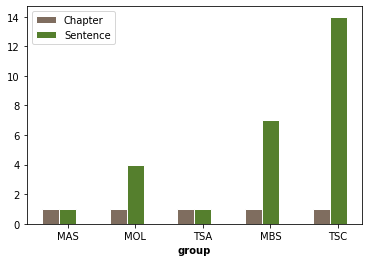

In [44]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [1, 1, 1, 1, 1]
bars2 = [1, 4, 1, 7, 14]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Chapter')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Sentence')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MAS', 'MOL', 'TSA', 'MBS', 'TSC'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

### The Murder on the Links 

######Story told from viewpoint of Arthur Hastings, who is Hercule Poirot's sidekick.
####Hercule first appears in the 4th sentence of the first chapter.
i had been transacting some business in paris and was returning by the morning service to london where i was still sharing rooms with my old friend, the belgian ex-detective, hercule poirot"

###  The Mysterious Affair at Styles 

####Story told from viewpoint of Arther Hastings, Hercule Poirot's sidekick.
####Hercule first appears in the 1st sentence of the 1st chapter.
"nevertheless, in view of the world-wide notoriety which attended it, i have been asked, both by my friend poirot and the family themselves, to write an account of the whole story"

### The Secret Adversary 

In [68]:
print("####", det_occur3[0])

#### ['Chapter: 1', 'Sentence: 0', 'Contents:  “tommy, old thing']


### The Man in the Brown Suit 

In [45]:
print("####", det_occur4[0])

#### ['Chapter: 1', 'Sentence: 7', 'Contents: anne beddingfeld starts to narrate her adventures']


### The Secret of Chimneys 

In [46]:
print("####", det_occur5[0])

#### ['Chapter: 1', 'Sentence: 14', 'Contents: anthony cade and his friend had stepped a little apart']


### Q2. When is the crime first mentioned - the type of the crime and the details - chapter #, the sentence(s) # in a chapter,

### The Murder on the Links 


######The murder of Paul Renauld is revealed at the end of chapter 2 in sentence 323.
"m. renauld was murdered this morning"
####The time when the body is discovered is reported in chapter 3 sentence 53
"the body was discovered this morning about nine o’clock"
####The methodology is described in chapter 3 sentence 90
"going to call her mistress as usual, a younger maid, léonie, was horrified to discover her gagged and bound, and almost at the same moment news was brought that m. renauld’s body had been discovered, stone dead, stabbed in the back"
####Who found the body is answered in chapter 6 sentence 59
"it was some of the men working on them who discovered the body early this morning"
####Time of death is reported in chapter 12 sentence 65
"they declared, after examination of the body, that death had taken place between ten and seven hours previously"
####Finally, the murderer is revealed in chapter 28 (via co-occurence with Hercule Poirot) sentence 95
####Note, Poirot exposes her as the murderer earlier (end of chapter 27), but definite evidence (within a single sentence) that Poirot is making his final accusation does not occur until chapter 28 sentence 95 near the end of a long conversation between Poirot and Hastings concerning how Poirot knew that Marthe was the murderess.

###  The Mysterious Affair at Styles 

####The murder of Emily Inglethorp occurs in chapter 3.
####The strychnine poisoning triggers a slow death scene from sentences 47-79
"mrs. inglethorp was lying on the bed, her whole form agitated by violent convulsions, in one of which she must have overturned the table beside her...then she fell back motionless on the pillows"
####The methodology of the murder is first described in chapter 4 sentence 124.
"the present contention is that mrs. inglethorp died of strychnine poisoning, presumably administered in her coffee"
####What susbstance the strychnine was dissolved in is revealed in chapter 12 sentence 206
####'the strychnine that killed mrs. inglethorp was the identical strychnine prescribed by dr. wilkins
####Chapter 12 sentence 235 explains that the strychnine was made lethal by the addition of Bromide
####'a lady in england lost her life by taking a similar mixture: the precipitated strychnine collected at the bottom, and in taking the last dose she swallowed nearly all of it'
####Alfred Inglethorp is revealed as the murderer in chapter 12 sentence 262
####'“ messieurs, mesdames ,” said poirot, with a flourish, “let me introduce you to the murderer, mr. alfred inglethorp'
####Miss Howard is revealed as the mastermind in chapter 13 sentence 75
####'i am inclined to think that miss howard was the master mind in that affair'
####Miss Howard is revealed as the recipient of a murder-planning letter in chapter 12 sentence 246, but she is not explicitly named by Poirot as mastermind until chapter 13 sentence 75
####'in the deathly silence, poirot pieced together the slips of paper and, clearing his throat, read: dearest evelyn:     ‘you will be anxious at hearing nothing'

 '], [13, 75, ],


### The Secret Adversary 

In [71]:
print("####", crime_occur3[0])

#### ['Chapter: 4', 'Sentence: 185', 'Contents: the disappearance of jane finn was forgotten and the whole affair was lost in oblivion']


### The Man in the Brown Suit 

In [47]:
print("####", crime_occur4[0])

#### ['Chapter: 4', 'Sentence: 25', 'Contents: the daily budget  had jumped to the conclusion that the man in the tube had murdered the woman and afterwards committed suicide']


### The Secret of Chimneys 

In [48]:
print("####", crime_occur5[0])

#### ['Chapter: 9', 'Sentence: 4', 'Contents: “he was killed less than half an hour ago']


In [49]:
#####See killed; but this is not the central crime of the story

### Q3. When is the perpetrator first mentioned - chapter #, the sentence(s) # in a chapter

### The Murder on the Links 

####Mademoiselle Daubreuil (Marthe) is first mentioned in chapter 7 sentence 145.
"mademoiselle daubreuil,' said m. hautet, sweeping off his hat, 'we regret infinitely to disturb you, but the exigencies of the law—you comprehend"

###  The Mysterious Affair at Styles 

####Alfred Inglethorp and Evelyn Howard are first mentioned in chapter 1 in sentences 32 and 40 respectively

### The Secret Adversary 

In [72]:
print("####", perp_occur3[0])

#### ['Chapter: 10', 'Sentence: 73', 'Contents: “in the meantime, you are going about everywhere with peel edgerton']


### The Man in the Brown Suit 

In [50]:
print("####", perp_occur4[0])

#### ['Chapter: 1', 'Sentence: 5', 'Contents: very fortunately, too, the gaps that i cannot supply from my own knowledge are amply covered by sir eustace pedler’s diary, of which he has kindly begged me to make use']


### The Secret of Chimneys 

In [51]:
print("####", perp_occur5[0])

#### ['Chapter: 15', 'Sentence: 186', 'Contents: let me see—yes—that’s mademoiselle brun’s room']


### Q4. What are the 3 words that occur around the perpetrator on each mention (i.e., the three words preceding, and the three words following the mention of a perpetrator),

### The Murder on the Links 

['she', 'was', 'afraid', 'said', 'm', 'hautet']

['turned', 'to', 'her', 'dear', 'but', 'the']

['to', 'speak', 'before', 'as', 'my', 'daughter']

['us', 'it', 'was', 'i', 'beg', 'your']

['our', 'amélie', 'explained', 'with', 'a', 'blush']

['your', 'heart', 'on', 'she', 'is', 'not']

['the', 'quarrel', 'was', 'renauld', 'sprang', 'round']

['admitted', 'i', 'love', 'and', 'i', 'wish']

['boy', 'you', 'too', 'is', 'as', 'good']

['have', 'nothing', 'against', 'in', 'any', 'way']

['your', 'intentions', 'towards', 'he', 'resumed', 'he']

['he', 'had', 'against', 'to', 'that', 'he']

['i', 'was', 'marrying', 'and', 'not', 'her']

['i', 'wrote', 'to', 'telling', 'her', 'what']

['yesterday', 'it', 'was', 'today', 'it', 'is']

['to', 'rag', 'me', 'is', 'a', 'very']

['him', 'out', 'with', 'but', 'i', 'fear']

['beautiful', 'girl', 'like', 'and', 'the', 'result']

['always', 'think', 'of', 'as', 'the', 'girl']

['of', 'the', 'beautiful', 'chéri', 'she', 'was']

['you', 'know', 'it', 'jack', 'renauld', 'replied']

['deep', 'anxiety', 'underlying', 's', 'tones—but', 'i']

['the', 'reason', 'of', 's', 'poignant', 'anxiety']

['thing', 'was', 'certain', 'had', 'known', 'all']

['see', 'my', 'fiancée', 'i', 'was', 'on']

['over', 'his', 'shoulder', 'may', 'find', 'herself']

['the', 'moment', 'that', 'looking', 'slightly', 'startled']

['house', 'maman', 'whispered', 'i', 'must', 'go']

['absolute', 'truth', 'unwittingly', 'told', 'us', 'the']

['if', 'he', 'saw', 'on', 'the', 'night']

['me', 'to', 'see', 'before', 'he', 'could']

['did', 'not', 'see', 'whom', 'did', 'he']

['wish', 'to', 'marry', 'son', 'leaves', 'for']

['garden', 'witnessed', 'by', 'letter', 'written', 'to']

['wish', 'to', 'marry', 'son', 'leaves', 'for']

['returning', 'to', 'see', 'come', 'face', 'to']

['the', 'ears', 'of', 'i', 'shook', 'my']

['to', 'help', 'us', 'i', 'handed', 'it']

['the', 'villa', 'marguerite', 'was', 'at', 'the']

['poirot', 'watching', 'her', 'frowned', 'screening', 'some']

['s', 'real', 'name', 'looked', 'at', 'him']

['departure', 'for', 'england', 'listened', 'spellbound', 'when']

['merlinville', 'to', 'rejoin', 'and', 'his', 'mother']

['after', 'i', 'met', 'and', 'realized', 'i']

['its', 'coming', 'to', 's', 'ears', 'and']

['order', 'to', 'see', 'before', 'going', 'to']

['in', 'person', 'to', 'eh', 'finished', 'poirot']

['are', 'jack', 'and', 'i', 'exclaimed', 'looking']

['better', 'not', 'but', 'and', 'i', 'in']

['murmured', 'poirot', 'to', 'where', 'can', 'we']

['the', 'charge', 'of', 'and', 'her', 'mother']

['the', 'profile', 'of', 'ah', 'said', 'poirot']

['into', 'the', 'bedroom', 'was', 'embroidering', 'by']

['the', 'profile', 'of', 'as', 'she', 'bent']

['beautiful', 'face', 'of', '', 'i', 'have']

['that', 'we', 'found', 's', 'body', 'in']

['them', 'yes', 'from', 's', 'own', 'lips']

['easily', 'you', 'overheard', 's', 'conversation', 'with']

['possible', 'motive', 'could', 'have', 'for', 'murdering']

['the', 'standpoint', 'of', 'marthe', 'daubreuil', 'overhears']

['of', 'marthe', 'daubreuil', 'overhears', 'what', 'passes']

['the', 'mind', 'of', 'in', 'fact', 'i']

['me', 'infallibly', 'to', 'the', 'dagger', 'jack']

['third', 'one', 'to', 'so', 'then', 'to']

['of', 'note', 'against', '(1)', 'marthe', 'daubreuil']

['marthe', 'daubreuil', '(1)', 'could', 'have', 'overheard']

['s', 'plans', '(2)', 'had', 'a', 'direct']

['s', 'death', '(3)', 'was', 'the', 'daughter']

['actual', 'blow', '(4)', 'was', 'the', 'only']

['the', 'crime', 'was', 'but', 'i', 'had']

['by', 'jack', 'to', 'why', 'then', 'bella']

['steps', 'to', 'force', 'into', 'the', 'open']

['as', 'i', 'thought', 'made', 'a', 'last']

['brains', 'that', 'beautiful', 'and', 'her', 'object']

['the', 'floor', 'by', 's', 'body', 'i']

['go', 'quite', 'as', 'had', 'planned', 'to']

['last', 'chance', 'for', 'the', 'idea', 'of']

['begin', 'to', 'suspect', 'poirot', 'when', 'she']

['have', 'thought', 'of', 'from', 'the', 'beginning']

['a', 'siren', 'and', 'as', 'the', 'girl']

['to', 'the', 'truth', 'was', 'very', 'beautiful']

###  The Mysterious Affair at Styles 


['us', 'as', 'for', 'you', 'remember', 'evie']

['for', 'evie—you', 'remember', 'no', 'oh', 'i']

['a', 'great', 'sport—old', 'not', 'precisely', 'young']

['of', 'being', 'a', 'or', 'something', 'of']

['or', 'something', 'of', 's', 'though', 'she']

['that', 'she', 'and', 'were', 'engaged', 'the']

['for', 'that', 'fellow', 'he', 'checked', 'the']

['our', 'approach', 'hullo', 'here', 's', 'our']

['hero', 'mr', 'hastings', 'miss', 'howard', 'shook']

['mr', 'hastings—miss', 'howard', 'shook', 'hands', 'with']

['re', 'a', 'cynic', 'said', 'john', 'laughing']

['refreshed', 'well', 'said', 'drawing', 'off', 'her']

['princess', 'after', 'tea', 'i', 'll', 'write']

['are', 'so', 'thoughtful', 'dear', 'the', 'french']

['all', 'these', 'years', 'darling', 'mr', 'hastings—my']

['some', 'curiosity', 'at', 'darling', 'he', 'certainly']

['upon', 'the', 'company', 'in', 'particular', 'took']

['about', 'letters', 'to', 'and', 'her', 'husband']

['story', 'myself', 'remarked', 'lots', 'of', 'nonsense']

['of', 'a', 'mess', 's', 'had', 'a']

['a', 'row', 'with', 'and', 'she', 's']

['she', 's', 'off', 'off', 'john', 'nodded']

['and—oh', '—here', 's', 'herself', 'miss', 'howard']

['s', 'evie', 'herself', 'entered', 'her', 'lips']

['mind', 'my', 'dear', 'cried', 'mrs', 'cavendish']

['t', 'be', 'true', 'nodded', 'grimly', 'true']

['just', 'ask', 'your', 'how', 'much', 'time']

['did', 'she', 'say', 'made', 'an', 'extremely']

['expressive', 'grimace', 'darling', '—', 'dearest', 'alfred']

['alfred', '—', 'dearest', '—', 'wicked', 'calumnies']

['left', 'the', 'room', 's', 'face', 'changed']

['her', 'of', 'course', 'i', 'said', 'i']

['open', 'window', 'and', 'rose', 'and', 'moved']

['time', 'for', 'more', 'was', 'swallowed', 'up']

['in', 'england', 'than', 'he', 'took', 'the']

['the', 'one', 'that', '', 'exactly', 'said']

['felt', 'that', 'with', 'something', 'indefinable', 'had']

['a', 'letter', 'from', 'a', 'couple', 'of']


['gipsy', 'face', 'and', 's', 'warnings', 'but']

['a', 'few', 'moments', 'had', 'ushered', 'the']

['i', 'realized', 'that', 'was', 'not', 'with']

['on', 'the', 'doctor', 'alfred—', 'then', 'she']

['the', 'doctor', 'alfred', '', 'then', 'she']

['met', 'where', 'was', 'his', 'absence', 'was']

['mrs', 'inglethorp', 'and', 'and', 'of', 'the']

['we', 'passed', 'through', 's', 'room', 'and']

['one', 'was', 'to', 'and', 'one', 'was']

['had', 'gone', 'to', 'writing', 'notices', 'for']

['i', 'pass', 'over', 'who', 'acted', 'the']

['family—we', 'will', 'say', 'for', 'instance—would', 'you']

['her', 'money', 'to', 'i', 'asked', 'in']

['it', 'swept', 'past', 'cried', 'john', 'excuse']

['inquiringly', 'at', 'me', 'i', 'explained', 'ah']

['the', 'hall', 'where', 'was', 'endeavouring', 'to']

['she', 'had', 'known', 'only', 'too', 'well']

['eat', 'this', 'morning', 'asked', 'john', 'no']

['us', 'you', 'know', 'miss', 'howard', 'shook']


['you', 'know', 'evie', 'shook', 'hands', 'with']

['to', 'prison', 'who', 'of', 'course', 'my']

['course', 'my', 'dear', 'do', 'be', 'careful']

['fool', 'lawrence', 'retorted', 'of', 'course', 'alfred']

['howard', 'of', 'course', 'murdered', 'poor', 'emily—as']

['would', 'my', 'dear', 'don', 't', 'shout']

['fiddlesticks', 'the', 'snort', 'gave', 'was', 'truly']

['dash', 'it', 'all', 'i', 'can', 't']

['that', 'to', 'harbour', 'and', 'alfred', 'inglethorp']

['miss', 'howard', 'and', 'under', 'the', 'same']

['sat', 'down', 'facing', 'mademoiselle', 'he', 'said']

['you', 'to', 'hang', 'with', 'pleasure', 'she']

['hang', 'the', 'criminal', 'him', 'or', 'another']

['along', 'comes', 'mr', 'and', 'within', 'two']

['presto', 'believe', 'me', 'said', 'poirot', 'very']

['s', 'better', 'said', 'more', 'enthusiastically', 'but']

['that', 'have', 'wept', 'blinked', 'and', 'a']

['mr', 'inglethorp', 'and', 'she', 'looked', 'at']

['her', 'fortune', 'to', 'it', 'must', 'have']

['yes', 'i', 'said', 'without', 'doubt', 'poirot']

['wilful', 'murder', 'against', 'what', 'becomes', 'of']

['if', 'i', 'let', 'her', 'husband', 'be']

['walked', 'on', 'sharply', 'had', 'been', 'right']

['i', 'thought', 'of', 's', 'liberality', 'with']

['and', 'gasped', 'out', 'alfred——', 'could', 'the']

['gasped', 'out', 'alfred', '—', 'could', 'the']

['that', 'is', 'all', 'miss', 'howard', 'produced']

['all', 'miss', 'howard', 'produced', 'the', 'letter']

['17th', 'my', 'dear', 'can', 'we', 'not']

['to', 'me', 'said', 'shortly', 'it', 'shows']

['of', 'the', 'jury', 'was', 'obviously', 'quite']

['apprehension', 'thank', 'you', 'that', 'is', 'all']

['simultaneously', 'to', 'where', 'was', 'sitting', 'impassive']

['a', 'breathless', 'silence', 'was', 'called', 'did']

['mace', 's', 'statement', 'replied', 'imperturbably', 'mr']

['pardon', 'me', 'interrupted', 'you', 'have', 'been']

['last', 'convinced', 'of', 's', 'guilt', 'mr']

['not', 'enough', 'and', 'must', 'not', 'be']

['the', 'possibility', 'of', 's', 'innocence', 'why']

['important', 'fact', 'that', 'wears', 'peculiar', 'clothes']

['the', 'case', 'of', 'all', 'that', 'is']

['glasses', 'was', 'not', 'it', 'may', 'be']

['the', 'fate', 'of', 'and', 'thought', 'that']

['should', 'be', 'shielding', 'yet', 'that', 'is']

['there', 's', 'john—and', 'surely', 'they', 'were']

['an', 'unpleasant', 'shock', 's', 'evidence', 'unimportant']

['so', 'i', 'asked', 'had', 'always', 'seemed']

['it', 'concerns', 'mr', 'inglethorp', 'was', 'sitting']

['with', 'a', 'groan', 'sank', 'down', 'again']

['speak', 'for', 'you', 'sprang', 'up', 'again']

['untrue', 'one', 'interrupted', 'in', 'an', 'agitated']

['baleful', 'glance', 'at', 'now', 'sir', 'said']

['suspicion', 'in', 'clearing', 'continued', 'poirot', 'i']

['absurd—but', 'i', 'suspect', 'of', 'not', 'telling']

['all', 'she', 'knows', 'yes—you', 'll', 'laugh']

['i', 'learnt', 'that', 'had', 'been', 'on']

['or', 'degenerate', 'about', 'she', 'is', 'an']

['are', 'there', 'against', 's', 'having', 'deliberately']

['a', 'child', 'if', 'were', 'capable', 'of']

['her', 'vehemence', 'against', 'is', 'too', 'violent']

['insuperable', 'objection', 'to', 's', 'being', 'the']

['s', 'death', 'benefit', 'now', 'there', 'is']

['in', 'my', 'mind', 'occupied', 'very', 'much']

['was', 'not', 'in', 's', 'favour', 'i']

['we', 'will', 'acquit', 'then', 'it', 'is']

['his', 'belief', 'in', 's', 'innocence', 'had']

['thoughtfully', 'here', 'comes', 'said', 'poirot', 'suddenly']

['was', 'barely', 'civil', 'assented', 'to', 'poirot']

['monsieur', 'poirot', 'said', 'impatiently', 'what', 'is']

['with', 'pleasure—to', 'hang', 'ah', 'poirot', 'studied']

['studied', 'her', 'seriously', 'i', 'will', 'ask']

['tell', 'lies', 'replied', 'it', 'is', 'this']

['good', 'heavens', 'cried', 'haven', 't', 'i']

['what', 'little', 'idea', 'do', 'you', 'remember']

['my', 'instinct', 'against', 'no', 'said', 'poirot']

['no', 'no', 'cried', 'wildly', 'flinging', 'up']

['it', 'must', 'be', 'poirot', 'shook', 'his']

['about', 'it', 'continued', 'because', 'i', 'shan']

['you', 'will', 'watch', 'bowed', 'her', 'head']

['we', 'are', 'right', 'on', 'whose', 'side']

['she', 'broke', 'off', 'said', 'poirot', 'gravely']

['that', 'was', 'not', 'who', 'spoke', 'she']

['proudly', 'this', 'is', 'and', 'she', 'is']

['ignored', 'you', 'and', 'seem', 'to', 'know']

['who', 'had', 'murdered', 'with', 'a', 'croquet']

['between', 'poirot', 'and', 'was', 'this', 'what']

['monstrous', 'possibility', 'that', 'had', 'tried', 'not']

['in', 'no', 'wonder', 'had', 'suggested', 'hushing']

['paul', 'prys', 'grunted', 'lawrence', 'opined', 'that']

['there', 'is', 'john—and', '', 'cynthia', 'nodded']

['and', 'of', 'course', 'for', 'all', 'her']

['me', 'she', 'wants', 'to', 'stay', 'on']

['sudden', 'entrance', 'of', 'she', 'glanced', 'round']

['existence', 'i', 'set', 'to', 'search', 'for']

['it', 'was', 'not', 'who', 'was', 'quarrelling']

['not', 'cross', 'examined', 'was', 'called', 'and']

['it', 'would', 'be', 'who', 'would', 'attend']

['anything', 'like', 'that', 'was', 'called', 'and']

['it', 'i', 'believe', 'that', 'it', 'was']

['my', 'beloved', 'husband', 'ing', 'this', 'placed']

['of', 'her', 'pride', 'had', 'been', 'right']

['her', 'animosity', 'against', 'had', 'caused', 'her']

['the', 'signature', 'of', 'in', 'the', 'chemist']

['the', 'name', 'of', 'no', 'that', 'is']

['he', 'did', 'so', 'here', 'mademoiselle', 'cynthia']

['him', 'a', 'note', 'rose', 'immediately', 'from']

['low', 'voice', 'finally', 'consented', 'to', 'return']

['few', 'minutes', 'later', 'entered', 'the', 'room']

['throat', 'read', 'dearest', 'you', 'will', 'be']

['the', 'murderer', 'mr', '', 'poirot', 'you']

['once', 'more', 'while', 'and', 'miss', 'howard']

['alfred', 'inglethorp', 'and', 'were', 'in', 'custody']

['you', 'saw', 'mr', 'that', 'astute', 'gentleman']

['the', 'conclusion', 'that', 'wanted', 'to', 'be']

['that', 'it', 'was', 'who', 'went', 'to']

['chemist', 's', 'shop', 'but', 'certainly', 'who']

['to', 'think', 'that', 'was', 'the', 'master']

['by', 'that', 'time', 'will', 'have', 'engineered']

['six', 'o', 'clock', 'arranges', 'to', 'be']

['from', 'the', 'village', 'has', 'previously', 'made']

['six', 'o', 'clock', 'disguised', 'as', 'alfred']

['howard', 'disguised', 'as', 'enters', 'the', 'chemist']

['the', 'name', 'of', 'in', 'john', 's']

['all', 'goes', 'well', 'goes', 'back', 'to']

['back', 'to', 'middlingham', 'returns', 'to', 'styles']

['since', 'it', 'is', 'who', 'has', 'the']

['her', 'husband', 'and', 'though', 'unfortunately', 'the']

['vase', 'but', 'surely', 'had', 'ample', 'opportunities']

['him', 'yes', 'but', 'did', 'not', 'know']

['never', 'spoke', 'to', 'they', 'were', 'supposed']

['begin', 'to', 'suspect', 'when', 'i', 'discovered']

['7th—the', 'day', 'after', 's', 'departure', 'the']

['myself', 'why', 'does', 'suppress', 'the', 'letter']

['two', 'reasons', 'why', 'could', 'not', 'have']

['that', 'she', 'and', 'were', 'cousins', 'she']

### The Secret Adversary 

In [73]:
for n in perp_neighbors3:
  print(n)

['about', 'everywhere', 'with', 'not', 'only', 'is']
['and', 'give', 'up', 'mrs', 'vandemeyer', 'shook']
['late', 'they', 'say', 'can', 'smell', 'a']
['all', 'that', 'interests', 'boris', 'shook', 'his']
['her', 'his', 'name', 'she', 'looked', 'at']
['boris', 's', 'agitation', 'would', 'not', 'be']
['began', 'tuppence', 'but', 'was', 'already', 'on']
['her', 'encounter', 'with', 'julius', 'was', 'interested']
['of', 'appealing', 'to', 'indeed', 'she', 'had']
['to', 'ask', 'if', 'was', 'at', 'home']
['will', 'you', 'ask', 'if', 'i', 'can']
['or', 'two', 'later', 'will', 'see', 'you']
['is', 'mr', 'hersheimmer', 'pleased', 'to', 'meet']
['sit', 'down', 'asked', 'he', 'drew', 'forward']
['forward', 'two', 'chairs', 'said', 'tuppence', 'plunging']
['breath', 'tommy', 'queried', 'looking', 'across', 'at']
['it', 'was', 'admitted', 'gravely', 'well', 'i']
['me', 'a', 'hint', 'smiled', 'at', 'her']
['to', 'well', 'said', 'still', 'smiling', 'without']
['the', 'whole', 'story', 'i', 've', 'a']

### The Man in the Brown Suit 

In [52]:
for n in perp_neighbors4:
  print(n)

['amply', 'covered', 'by', 's', 'diary', 'of']
['the', 'property', 'of', 'm', 'p', 'is']
['have', 'a', 'clue', 'the', 'owner', 'of']
['the', 'wife', 'of', 's', 'gardener', 'who']
['course', 'there', 's', 's', 'place', 'said']
['reporters', 'i', 'am', 's', 'orders', 'are—']
['the', 'lodge', 'if', 'hadn', 't', 'been']
['me', 'i', 'thought', 'was', 'at', 'cannes']
['roll', 'belonging', 'to', 'which', 'had', 'rolled']
['the', 'diary', 'of', 'm', 'p', ')']
['so', 'you', 'know', 'know', 'what', 'i']
['england', 'at', 'once', 'you', 'need', 'suppose']
['suggestion', 'my', 'dear', 'the', 'common', 'post']
['reasons', 'my', 'dear', 'i', 'assure', 'you']
['minute', 'my', 'dear', 'one', 'minute', 'i']
['obliged', 'to', 'you', 'i', 'will', 'send']
['to', 'tell', 'you', 'that', 'he', 'comes']
['me', 'to', 'you', 'i', 'am', 'to']
['think', 'you', 'do', 'where', 'is', 'your']
['tell', 'you', 'this', 'mr', 'milray', 'would']
['oh', 'that', 's', 's', 'secretary', 'been']
['not', 'appeared', 'before', '

### The Secret of Chimneys 

In [53]:
for n in perp_neighbors5:
  print(n)

['make', 'it', 'stron', 'he', 'implored', 'i']
['something', 'about', 'thi', 'he', 'said', 'take']
['dust', 'and', 'ashe', 'every', 'move', 'and']
['good', 'for', 'yo', 'said', 'anthony', 'softly']
['perceive', 'your', 'drif', 'you', 'go', 'gold']
['me', 'tell', 'yo', 'mcgrath', 'you', 'won']
['better', 'travel', 'a', 'mcgrath', 'we', 've']
['in', 'my', 'bone', 'that', 'people', 'are']
['i', 'tell', 'yo', 'where', 'i', 'propose']
['shares', 'you', 'kno', 'the', 'more', 'i']
['and', 'for', 'al', 'i', 'refuse', 'to']
['the', 'good', 'wor', 'well', 'the', 'fellow']
['your', 'righteous', 'hea', 'but', 'let', 'me']
['england', 'my', 'dea', 'a', 'place', 'where']
['this', 'unknown', 'lad', 'jimmy', 'ran', 'his']
['called', 'jimmy', 'o', 'mcgrath', 'a', 'canadian']
['lord', 'caterham', 'cheeril', 'mcgrath', 'is', 'due']
['for', 'granted', 'tha', 'mcgrath', 'would', 'duly']
['answered', 'him', 'm', 'mcgrath', 'speaking', 'a']
['of', 'harley', 'stree', 'revel', '&', 'co']
['letter', 'yours', 'f

## 5. When and how the detective/detectives and the perpetrators co-occur - chapter #, the sentence(s) # in a chapter,

### The Murder on the Links 

####Arthur Hastings (sidekick) and Marthe (perpetrator) first co-occur in chapter 18 sentence 114.
'now, hastings, what was jack renauld doing here on that eventful evening, and if he did not see mademoiselle marthe whom did he see'
####Hercule Poirot (detective) and Marthe (perpetrator) first co-occur in chapter 24 sentence 187
'marthe was at the door to meet us, and led poirot in, clinging with both hands to one of his'
####Poirot and Marthe again co-occur in chapter 27 sentence 82
“while you break it in person to mademoiselle marthe, eh?” finished poirot, with a twinkle'
####They co-occur again in chapter 27 sentence 156
“he is overdone,” murmured poirot to marthe'
####As well as chapter 27 sentence 260
'poirot looked over his shoulder once at the lighted window and the profile of marthe as she bent over her work'
#### Hastings and Marthe co-occur in chapter 28 sentence 137
“however, hastings, things did not go quite as mademoiselle marthe had planned'
####Finally, Poirot and Marthe co-occur in chapter 28 sentence 145
“when did you first begin to suspect marthe daubreuil, poirot'

###  The Mysterious Affair at Styles 

####Arthur Hastings and Evelyn Howard first occur together in chapter 1 sentence 82
####Arthur Hastings and Alfred Inglethorp first occur together in chapter 1 sentence 125
####Arthur Hastings, Alfred Inglethorp and Evelyn Howard co-occur in chapter 1 sentence 144

####Hercule Poirot and Alfred Inglethorp first co-occur in chapter 4 sentence 293
####Hercule Poirot and Evelyn Howard first co-occur in chapter 5 sentence 233
####Further co-occurrences:
#####chapter 5  sentence 377: Evelyn and Hercule
#####chapter 5  sentence 422: Evelyn and Hercule
#####chapter 5  sentence 438: Evelyn and Hercule
#####chapter 7  sentence 276: Alfred and Hercule
#####chapter 7  sentence 317: Alfred and Hercule
#####chapter 8  sentence 139: Alfred and Hercule
#####chapter 8  sentence 400: Evelyn and Hercule
#####chapter 8  setnence 404: Evelyn and Hercule
#####chapter 8  sentence 406: Evelyn and Hercule
#####chapter 8  sentence 501: Evelyn and Hercule
#####chapter 9  sentence 295: Evelyn and Hercule
#####chapter 12 sentence 246: Evelyn and Hercule
#####chapter 12 sentence 262: Alfred and Hercule
#####chapter 13 sentence  28: Alfred and Hercule

### The Secret Adversary 

In [74]:
print("Lead detectives: Tommy and Tuppence")
print("Perpetrator: Sir James Peel Edgerton")

for n in co3:
  print(n)

Lead detectives: Tommy and Tuppence
Perpetrator: Sir James Peel Edgerton
['Chapter: 10', 'Sentence: 170', 'Contents: tuppence was undecided for the moment whether to put him down as an actor or a lawyer, but her doubts were soon solved as he gave her his name: sir james peel edgerton']
['Chapter: 12', 'Sentence: 60', 'Contents: “sir james,” said tuppence, plunging boldly, “i dare say you will think it is most awful cheek of me coming here like this']
['Chapter: 12', 'Sentence: 63', 'Contents: “tommy?” queried sir james, looking across at the american']
['Chapter: 12', 'Sentence: 104', 'Contents: “oh, sir james,” broke out tuppence, “what do you think has become of tommy']
['Chapter: 13', 'Sentence: 8', 'Contents: between them sir james and tuppence lifted mrs. vandemeyer and carried her to the bed']
['Chapter: 13', 'Sentence: 58', 'Contents: “miss tuppence is right,” said sir james quietly']
['Chapter: 13', 'Sentence: 128', 'Contents: “now then, miss tuppence,” said sir james, “you kno

### The Man in the Brown Suit 

In [54]:
print("Lead detective: Anne Beddingfeld")
print("Perpetrator: Sir Eustace Pedler")

for n in co4:
  print(n)

Lead detective: Anne Beddingfeld
Perpetrator: Sir Eustace Pedler
['Chapter: 20', 'Sentence: 140', 'Contents: “oh, anne, you surely can’t suspect colonel race or sir eustace']
['Chapter: 33', 'Sentence: 109', 'Contents: you didn’t know, did you, sir eustace, that anne had an arrangement with me by which we should know whether communications from one to the other were genuine']


### The Secret of Chimneys 

In [55]:
print("Lead detective: Anthony Cade")
print("Perpetrator(s): Mademoiselle Brun")

for n in co5:
  print(n)

Lead detective: Anthony Cade
Perpetrator(s): Mademoiselle Brun
['Chapter: 15', 'Sentence: 193', 'Contents: “mademoiselle brun,” said anthony thoughtfully']


### Q6. When are other suspects first introduced - chapter #, the sentence(s) # in a chapter

### The Murder on the Links 

####Jack Renauld is the red herring in this book.
####He first appears in chapter 3 sentence 118.
'finally there are madame renauld and her son, m. jack renauld'

###  The Mysterious Affair at Styles 

####John Cavendish is the red herring in this book.
####He first appears in chapter 1 sentence 5.
"having no near relations or friends, i was trying to make up my mind what to do, when i ran across john cavendish"

### The Secret Adversary 

In [75]:
print(sus_occur3[0])

['Chapter: 4', 'Sentence: 56', 'Contents: “yours truly, “julius p. hersheimmer']


### The Man in the Brown Suit 

In [56]:
print(sus_occur4[0])

['Chapter: 8', 'Sentence: 182', 'Contents: “harry rayburn seems quite a suitable name,” he observed']


### The Secret of Chimneys 

In [57]:
print(sus_occur5[0])

['Chapter: 2', 'Sentence: 83', 'Contents: they were king victor’s people, he said']




## Discussion



## Additional/Extra Analysis


#### Bag of Words Analysis 


In [58]:
perp1=get_perp(1)
perp2=get_perp(2)
perp3=get_perp(3)
perp4=get_perp(4)
perp5=get_perp(5)
red1=get_sus(1)
red2=get_sus(2)
red3=get_sus(3)
red4=get_sus(4)
red5=get_sus(5)
perp_neighbors1=get_3words(1,perp1)
perp_neighbors2=get_3words(2,perp2)
perp_neighbors3=get_3words(3,perp3)
perp_neighbors4=get_3words(4,perp4)
perp_neighbors5=get_3words(5,perp5)

sus_neighbors1=get_3words(1,red1)
sus_neighbors2=get_3words(2,red2)
sus_neighbors3=get_3words(3,red3)
sus_neighbors4=get_3words(4,red4)
sus_neighbors5=get_3words(5,red5)

perp5bag=[word for words in perp_neighbors5 for word in words]
perp4bag=[word for words in perp_neighbors4 for word in words]
perp3bag=[word for words in perp_neighbors3 for word in words]
perp2bag=[word for words in perp_neighbors2 for word in words]
perp1bag=[word for words in perp_neighbors1 for word in words]

sus1bag=[word for words in sus_neighbors1 for word in words]
sus2bag=[word for words in sus_neighbors2 for word in words]
sus3bag=[word for words in sus_neighbors3 for word in words]
sus4bag=[word for words in sus_neighbors4 for word in words]
sus5bag=[word for words in sus_neighbors5 for word in words]
perp5bag=' '.join(perp5bag)
perp4bag=' '.join(perp4bag)
perp3bag=' '.join(perp3bag)
perp2bag=' '.join(perp2bag)
perp1bag=' '.join(perp1bag)
sus1bag=' '.join(sus1bag)
sus2bag=' '.join(sus2bag)
sus3bag=' '.join(sus3bag)
sus4bag=' '.join(sus4bag)
sus5bag=' '.join(sus5bag)

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer(stop_words='english',max_df=.80)
trsfm=vectorizer.fit_transform([perp1bag,perp2bag,perp3bag,perp4bag,perp5bag])
tfid_data=pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Perp 1','Perp 2','Perp 3','Perp 4','Perp 5'])
print(tfid_data)
tfid_data=tfid_data.replace(0,.00001)
print(tfid_data)
import numpy as np
importance = np.argsort(np.asarray(trsfm.sum(axis=0)).ravel())[::-1]
tfidf_feature_names = np.array(vectorizer.get_feature_names())
print(tfidf_feature_names[importance[:20]])
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(trsfm[0:10], trsfm))


            17th       7th     about   absence  absolute    absurd  accepted  \
Perp 1  0.000000  0.000000  0.000000  0.000000  0.033753  0.000000  0.000000   
Perp 2  0.017485  0.017485  0.035130  0.017485  0.000000  0.017485  0.000000   
Perp 3  0.000000  0.000000  0.024470  0.000000  0.000000  0.000000  0.000000   
Perp 4  0.000000  0.000000  0.038156  0.000000  0.000000  0.000000  0.014244   
Perp 5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

        accompanied  accompanying  accordingly  ...   written     wrote  \
Perp 1     0.000000      0.000000     0.000000  ...  0.033753  0.027232   
Perp 2     0.000000      0.000000     0.000000  ...  0.000000  0.000000   
Perp 3     0.014739      0.000000     0.018269  ...  0.000000  0.000000   
Perp 4     0.022983      0.014244     0.000000  ...  0.000000  0.011492   
Perp 5     0.000000      0.000000     0.000000  ...  0.000000  0.000000   

           years       yes  yesterday       yet       you     young 

In [59]:
!pip install textdistance
import textdistance

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

cfm=vectorizer.fit_transform([perp1bag,perp2bag,perp3bag,perp4bag,perp5bag])
c_data=pd.DataFrame(cfm.toarray(),columns=vectorizer.get_feature_names(),index=['Perp 1','Perp 2','Perp 3','Perp 4','Perp 5'])
print(c_data)
count_list = pd.DataFrame(c_data.sum(axis=0).sort_values(ascending=False))
print(len(count_list)*.01)
print(count_list[14:])
trimmed=count_list.index.values
trimmed_bag=' '.join(trimmed)
print(trimmed_bag)

from sklearn.metrics.pairwise import cosine_similarity
print("hamming")
print("book 1")
print(len(perp1bag),len(sus1bag))
print(textdistance.cosine.distance(trimmed_bag,perp1bag))
print(textdistance.cosine.distance(trimmed_bag,sus1bag))
print("book 2")
print(textdistance.cosine.distance(trimmed_bag,perp2bag))
print(textdistance.cosine.distance(trimmed_bag,sus2bag))
print("book 3")
print(textdistance.cosine.distance(trimmed_bag,perp3bag))
print(textdistance.cosine.distance(trimmed_bag,sus3bag))
print("book 4")
print(textdistance.cosine.distance(trimmed_bag,perp4bag))
print(textdistance.cosine.distance(trimmed_bag,sus4bag))
print("book 5")
print(textdistance.cosine.distance(trimmed_bag,perp5bag))
print(textdistance.cosine.distance(trimmed_bag,sus5bag))



print("cosine")
print(textdistance.cosine.normalized_distance(trimmed_bag,perp1bag))
print(textdistance.cosine.normalized_distance(trimmed_bag,sus1bag))
print("jaccard")
print(textdistance.jaccard.normalized_distance(trimmed_bag,perp1bag))
print(textdistance.jaccard.normalized_distance(trimmed_bag,sus1bag))


        17th  7th  about  absence  absolute  absurd  accepted  accompanied  \
Perp 1     0    0      0        0         1       0         0            0   
Perp 2     1    1      3        1         0       1         0            0   
Perp 3     0    0      2        0         0       0         0            1   
Perp 4     0    0      4        0         0       0         1            2   
Perp 5     0    0      0        0         0       0         0            0   

        accompanying  accordingly  ...  written  wrote  years  yes  yesterday  \
Perp 1             0            0  ...        1      1      0    1          1   
Perp 2             0            0  ...        0      0      1    3          0   
Perp 3             0            1  ...        0      0      0    4          0   
Perp 4             1            0  ...        0      1      1    9          0   
Perp 5             0            0  ...        0      0      0    1          0   

        yet  you  young  your  yours  
Perp 

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer(stop_words='english',max_df=.80)
trsfm=vectorizer.fit_transform([perp1bag,perp2bag,perp3bag,perp4bag,perp5bag])
tfid_data=pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Perp 1','Perp 2','Perp 3','Perp 4','Perp 5'])
tfid_data=tfid_data.replace(0,.00001)
print(tfid_data)
from scipy import stats
vectorizer2 = TfidfVectorizer()
count_list = pd.DataFrame(tfid_data.sum(axis=0).sort_values(ascending=False))
print(len(count_list)*.01)
print(count_list[15:])
trimmed=count_list[15:].index.values
print(trimmed)
#print(stats.entropy(df.))

            17th       7th     about   absence  absolute    absurd  accepted  \
Perp 1  0.000010  0.000010  0.000010  0.000010  0.033753  0.000010  0.000010   
Perp 2  0.017485  0.017485  0.035130  0.017485  0.000010  0.017485  0.000010   
Perp 3  0.000010  0.000010  0.024470  0.000010  0.000010  0.000010  0.000010   
Perp 4  0.000010  0.000010  0.038156  0.000010  0.000010  0.000010  0.014244   
Perp 5  0.000010  0.000010  0.000010  0.000010  0.000010  0.000010  0.000010   

        accompanied  accompanying  accordingly  ...   written     wrote  \
Perp 1     0.000010      0.000010     0.000010  ...  0.033753  0.027232   
Perp 2     0.000010      0.000010     0.000010  ...  0.000010  0.000010   
Perp 3     0.014739      0.000010     0.018269  ...  0.000010  0.000010   
Perp 4     0.022983      0.014244     0.000010  ...  0.000010  0.011492   
Perp 5     0.000010      0.000010     0.000010  ...  0.000010  0.000010   

           years       yes  yesterday       yet       you     young 

In [62]:
!pip install textdistance
import textdistance

In [63]:
print("Hamming")
print(textdistance.hamming.normalized_distance(perp1bag,perp2bag))
print(textdistance.hamming.normalized_distance(perp1bag,perp3bag))
print(textdistance.hamming.normalized_distance(perp1bag,perp4bag))
print(textdistance.hamming.normalized_distance(perp1bag,perp5bag))
print(textdistance.hamming.normalized_distance(perp1bag,sus1bag))
print(textdistance.hamming.normalized_distance(perp1bag,sus2bag))
print(textdistance.hamming.normalized_distance(perp1bag,sus3bag))
print(textdistance.hamming.normalized_distance(perp1bag,sus4bag))
print(textdistance.hamming.normalized_distance(perp1bag,sus5bag))
print("Jaccard")
print(textdistance.jaccard.distance(perp1bag,perp2bag))
print(textdistance.jaccard.distance(perp1bag,perp3bag))
print(textdistance.jaccard.distance(perp1bag,perp4bag))
print(textdistance.jaccard.distance(perp1bag,perp5bag))
print(textdistance.jaccard.distance(perp1bag,sus1bag))
print(textdistance.jaccard.distance(perp1bag,sus2bag))
print(textdistance.jaccard.distance(perp1bag,sus3bag))
print(textdistance.jaccard.distance(perp1bag,sus4bag))
print(textdistance.jaccard.distance(perp1bag,sus5bag))
print("Bag")
print(textdistance.bag.normalized_distance(perp1bag,perp2bag))
print(textdistance.bag.normalized_distance(perp1bag,perp3bag))
print(textdistance.bag.normalized_distance(perp1bag,perp4bag))
print(textdistance.bag.normalized_distance(perp1bag,perp5bag))
print(textdistance.bag.normalized_distance(perp1bag,sus1bag))
print(textdistance.bag.normalized_distance(perp1bag,sus2bag))
print(textdistance.bag.normalized_distance(perp1bag,sus3bag))
print(textdistance.bag.normalized_distance(perp1bag,sus4bag))
print(textdistance.bag.normalized_distance(perp1bag,sus5bag))
print("Overlap")
print(textdistance.overlap.normalized_distance(perp1bag,perp2bag))
print(textdistance.overlap.normalized_distance(perp1bag,perp3bag))
print(textdistance.overlap.normalized_distance(perp1bag,perp4bag))
print(textdistance.overlap.normalized_distance(perp1bag,perp5bag))
print(textdistance.overlap.normalized_distance(perp1bag,sus1bag))
print(textdistance.overlap.normalized_distance(perp1bag,sus2bag))
print(textdistance.overlap.normalized_distance(perp1bag,sus3bag))
print(textdistance.overlap.normalized_distance(perp1bag,sus4bag))
print(textdistance.overlap.normalized_distance(perp1bag,sus5bag))

Hamming
0.9673436230706742
0.9694539249146757
0.9752527940393827
0.9869971556277936
0.9652236913602609
0.9675776608385673
0.9836010143702452
0.925575101488498
0.926046322633076
Jaccard
0.6040181464679196
0.5846232352440892
0.6745051149196226
0.8541835905767668
0.5589456580610219
0.5870411097952969
0.7937030471849413
0.19973413094051184
0.19581825492561322
Bag
0.6029244516653127
0.5832764505119454
0.6740287386907929
0.8541243396993092
0.5575076978808187
0.5856391105075539
0.7934065934065934
0.18538565629228687
0.18732222673709875
Overlap
0.006907761072734608
0.0077204388459976014
0.004469727752945962
0.002777777777777768
0.00731409995936616
0.008126777732629042
0.006907761072734608
0.02153596099146693
0.012833168805528095


In [64]:
print("using books 1,3,4,5")
bag1345=' '.join([perp1bag,perp3bag,perp4bag,perp5bag])
print("book 1")
print(textdistance.jaccard.distance(bag1345,perp1bag))
print(textdistance.jaccard.distance(bag1345,sus1bag))

print("book 2")
print(textdistance.jaccard.distance(bag1345,perp2bag))
print(textdistance.jaccard.distance(bag1345,sus2bag))
print("book 3")
print(textdistance.jaccard.distance(bag1345,perp3bag))
print(textdistance.jaccard.distance(bag1345,sus3bag))
print("book 4")
print(textdistance.jaccard.distance(bag1345,perp4bag))
print(textdistance.jaccard.distance(bag1345,sus4bag))
print("book 5")
print(textdistance.jaccard.distance(bag1345,perp5bag))
print(textdistance.jaccard.distance(bag1345,sus5bag))
print("using 1345 fails on 1")
print("using books 1,2,4,5")
bag1245=' '.join([perp1bag,perp2bag,perp4bag,perp5bag])
print("book 1")
print(textdistance.jaccard.distance(bag1245,perp1bag))
print(textdistance.jaccard.distance(bag1245,sus1bag))
print("book 2")
print(textdistance.jaccard.distance(bag1245,perp2bag))
print(textdistance.jaccard.distance(bag1245,sus2bag))
print("book 3")
print(textdistance.jaccard.distance(bag1245,perp3bag))
print(textdistance.jaccard.distance(bag1245,sus3bag))
print("book 4")
print(textdistance.jaccard.distance(bag1245,perp4bag))
print(textdistance.jaccard.distance(bag1245,sus4bag))
print("book 5")
print(textdistance.jaccard.distance(bag1245,perp5bag))
print(textdistance.jaccard.distance(bag1245,sus5bag))
print('using books 1245 fails on 1')
print("using books 1,2,3,5")
bag1235=' '.join([perp1bag,perp2bag,perp3bag,perp5bag])
print("book 1")
print(textdistance.jaccard.distance(bag1235,perp1bag))
print(textdistance.jaccard.distance(bag1235,sus1bag))

print("book 2")
print(textdistance.jaccard.distance(bag1235,perp2bag))
print(textdistance.jaccard.distance(bag1235,sus2bag))
print("book 3")
print(textdistance.jaccard.distance(bag1235,perp3bag))
print(textdistance.jaccard.distance(bag1235,sus3bag))
print("book 4")
print(textdistance.jaccard.distance(bag1235,perp4bag))
print(textdistance.jaccard.distance(bag1235,sus4bag))
print("book 5")
print(textdistance.jaccard.distance(bag1235,perp5bag))
print(textdistance.jaccard.distance(bag1235,sus5bag))
print("using books 1235 fails on 1")
print("using books 1,2,3,4")
bag1234=' '.join([perp1bag,perp2bag,perp3bag,perp4bag])
print("book 1")
print(textdistance.jaccard.distance(bag1234,perp1bag))
print(textdistance.jaccard.distance(bag1234,sus1bag))
print("book 2")
print(textdistance.jaccard.distance(bag1234,perp2bag))
print(textdistance.jaccard.distance(bag1234,sus2bag))
print("book 3")
print(textdistance.jaccard.distance(bag1234,perp3bag))
print(textdistance.jaccard.distance(bag1234,sus3bag))
print("book 4")
print(textdistance.jaccard.distance(bag1234,perp4bag))
print(textdistance.jaccard.distance(bag1234,sus4bag))
print("book 5")
print(textdistance.jaccard.distance(bag1234,perp5bag))
print(textdistance.jaccard.distance(bag1234,sus5bag))
print("using books 1234 fails on 1")
print("using books 2,3,4,5")
bag2345=' '.join([perp2bag,perp3bag,perp4bag,perp5bag])
print("book 1")
print(textdistance.jaccard.distance(bag2345,perp1bag))
print(textdistance.jaccard.distance(bag2345,sus1bag))

print("book 2")
print(textdistance.jaccard.distance(bag2345,perp2bag))
print(textdistance.jaccard.distance(bag2345,sus2bag))
print("book 3")
print(textdistance.jaccard.distance(bag2345,perp3bag))
print(textdistance.jaccard.distance(bag2345,sus3bag))
print("book 4")
print(textdistance.jaccard.distance(bag2345,perp4bag))
print(textdistance.jaccard.distance(bag2345,sus4bag))
print("book 5")
print(textdistance.jaccard.distance(bag2345,perp5bag))
print(textdistance.jaccard.distance(bag2345,sus5bag))


using books 1,3,4,5
book 1
0.8480864197530864
0.6591975308641975
book 2
0.6204875038568343
0.6364421949262391
book 3
0.6382716049382716
0.2713536848596978
book 4
0.5360493827160494
0.8175308641975308
book 5
0.9777777777777777
0.8749382716049383
using 1345 fails on 1
using books 1,2,4,5
book 1
0.8508032737193089
0.6652925128826916
book 2
0.6268566232191572
0.6429437439379244
book 3
0.6447408305547135
0.284477015323118
book 4
0.5443467717490149
0.820794180054562
book 5
0.9781752046074568
0.8771749014852985
using books 1245 fails on 1
using books 1,2,3,5
book 1
0.8341532448278186
0.6279398881326235
book 2
0.5852146371049263
0.6030997304582211
book 3
0.6050946829301166
0.204349582547805
book 4
0.4939028498282019
0.8007952018330076
book 5
0.9757396050946829
0.8634678886717434
using books 1235 fails on 1
using books 1,2,3,4
book 1
0.8881109343032507
0.7489884064560127
book 2
0.7201636735621733
0.7322240407346791
book 3
0.7335758126847011
0.46236021456496046
book 4
0.6582859740850193
0.865605

### Comparison with Spacy

In [ ]:
!pip install spacy

In [97]:
from spacy.lang.en import English 

# W.I.P.

dirty_corpus=get_corpus()


bookid=3
nch=len(corpus[bookid]["chapters"])
print(f"Book {bookid} has {nch} chapters.")

for bookid in range(1,6):
    nch=len(corpus[bookid]["chapters"])
    print(f"Book {bookid} has {nch} chapters.")
    for chid in range(1,nch):
        dirty_chapter=dirty_corpus[bookid]["contents"][chid]
        ch_doc = nlp(dirty_chapter)
        sentences = [sent.text.strip() for sent in ch_doc.sents]
        #print(sentences)
        print(f"Book {bookid}, Chapter {chid} has {len(sentences)} sentences.")

#print(dirty_corpus[bookid]["contents"][0])

#dirty_chapter=dirty_corpus[bookid]["contents"][1]
#b3c1_spacy = dirty_chapter
#print(b3c1_spacy)
#b3c1_doc = nlp(b3c1_spacy)
#sentences_b3c1_spacy = [sent.text.strip() for sent in b3c1_doc.sents]
#print(sentences_b3c1_spacy)
#print(len(sentences_b3c1_spacy))


Book 3 has 29 chapters.
Book 1 has 28 chapters.
Book 1, Chapter 1 has 180 sentences.
Book 1, Chapter 2 has 322 sentences.
Book 1, Chapter 3 has 302 sentences.
Book 1, Chapter 4 has 231 sentences.
Book 1, Chapter 5 has 245 sentences.
Book 1, Chapter 6 has 175 sentences.
Book 1, Chapter 7 has 323 sentences.
Book 1, Chapter 8 has 291 sentences.
Book 1, Chapter 9 has 217 sentences.
Book 1, Chapter 10 has 202 sentences.
Book 1, Chapter 11 has 328 sentences.
Book 1, Chapter 12 has 238 sentences.
Book 1, Chapter 13 has 288 sentences.
Book 1, Chapter 14 has 213 sentences.
Book 1, Chapter 15 has 234 sentences.
Book 1, Chapter 16 has 96 sentences.
Book 1, Chapter 17 has 194 sentences.
Book 1, Chapter 18 has 177 sentences.
Book 1, Chapter 19 has 155 sentences.
Book 1, Chapter 20 has 260 sentences.
Book 1, Chapter 21 has 174 sentences.
Book 1, Chapter 22 has 267 sentences.
Book 1, Chapter 23 has 135 sentences.
Book 1, Chapter 24 has 238 sentences.
Book 1, Chapter 25 has 103 sentences.
Book 1, Chap



## Dev notes

In [57]:
#Dev Notes: will refactor fetch() to generate dict of titles and indices rather than take in index
# I.e., fetch() is backwards. should assign index based on title while fetching url


#artifacts I've spotted in data:
# I noticed and "[Illustration]" artifact in the mysterious affair at style.

#possible start for sentence splitting regex
#sentence_regex = r'([\.\?!][\'\"\u2018\u2019\u201c\u201d\)\]]*\s*(?<!\w\.\w.)(?<![A-Z][a-z][a-z]\.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)\s+)

# V: do we need to clean up contractions to be spelled out? e.g., "I'm" to "I am", "don't" to "do not".
#  